In [1]:
# Importing the librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data importation
data = pd.read_csv('/content/smoke_detection_iot.csv')

# **Initial Data Exploration **




In [3]:
# Size of the data
data.shape

(62630, 16)

In [4]:
# Data information. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [5]:
# top 5 coloumns 
data.head(5)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [6]:
# To check NULL values 
data.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [7]:
data.describe().round(2)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.00,6.263000e+04,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00
mean,31314.50,1.654792e+09,15.97,48.54,1942.06,670.02,12942.45,19754.26,938.63,100.59,184.47,491.46,203.59,80.05,10511.39,0.71
std,18079.87,1.100025e+05,14.36,8.87,7811.59,1905.89,272.46,609.51,1.33,922.52,1976.31,4265.66,2214.74,1083.38,7597.87,0.45
min,0.00,1.654712e+09,-22.01,10.74,0.00,400.00,10668.00,15317.00,930.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,15657.25,1.654743e+09,10.99,47.53,130.00,400.00,12830.00,19435.00,938.70,1.28,1.34,8.82,1.38,0.03,3625.25,0.00
50%,31314.50,1.654762e+09,20.13,50.15,981.00,400.00,12924.00,19501.00,938.82,1.81,1.88,12.45,1.94,0.04,9336.00,1.00
75%,46971.75,1.654778e+09,25.41,53.24,1189.00,438.00,13109.00,20078.00,939.42,2.09,2.18,14.42,2.25,0.05,17164.75,1.00
max,62629.00,1.655130e+09,59.93,75.20,60000.00,60000.00,13803.00,21410.00,939.86,14333.69,45432.26,61482.03,51914.68,30026.44,24993.00,1.00


# **Exploratory data analysis**

In [8]:
data_Categorical = data.select_dtypes(exclude = np.number)
data_Numeric = data.select_dtypes(include=np.number)

ValueError: ignored

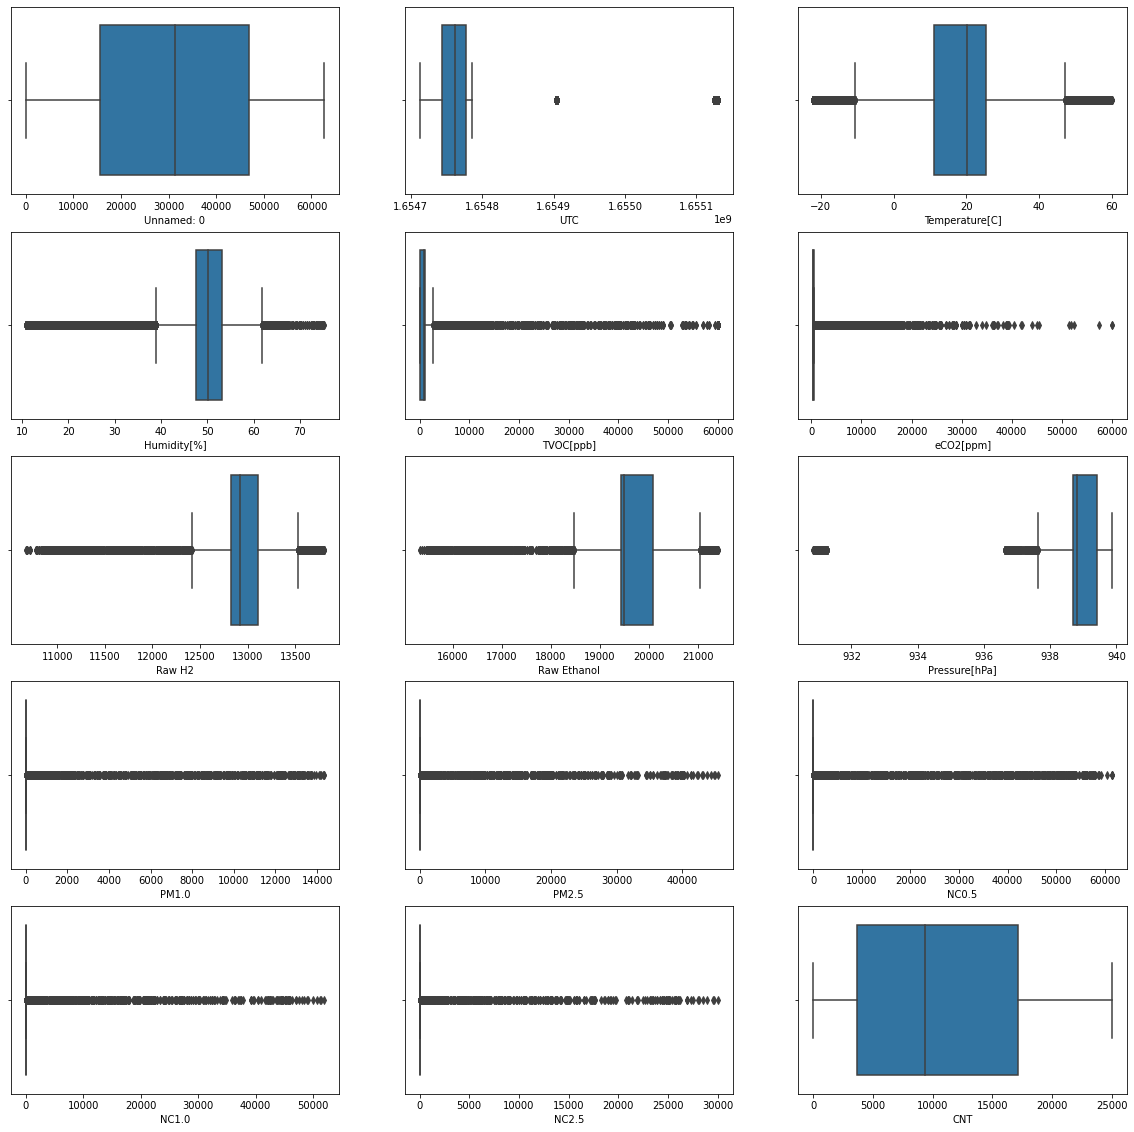

In [9]:
import seaborn as sns
plt.figure(figsize=(20,20))

for index,column in enumerate(data_Numeric):
  plt.subplot(5,3,index+1)
  sns.boxplot(data=data_Numeric,x=column)
    
plt.tight_layout(pad = 1.0)

In [10]:
dfNumeric = data_Numeric[data_Numeric["UTC"] < 1655105000]
dfNumeric = data_Numeric[data_Numeric["Pressure[hPa]"] > 932]

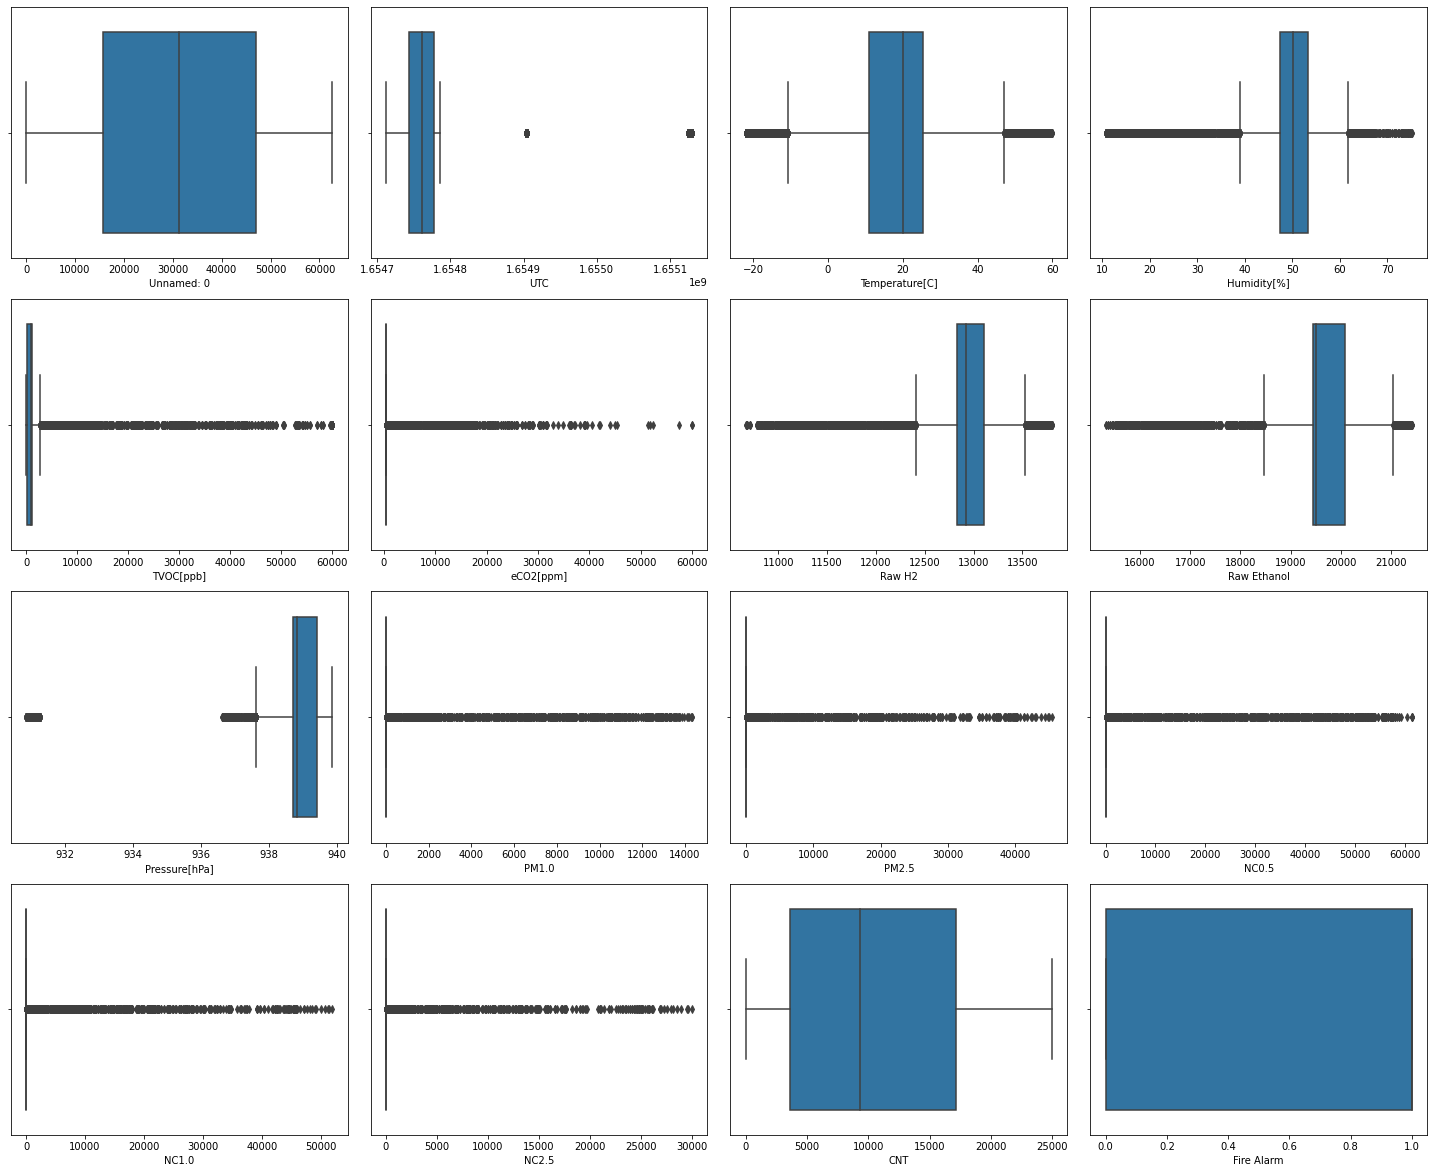

In [11]:
plt.figure(figsize=(20,20))

for index,column in enumerate(data_Numeric):
    plt.subplot(5,4,index+1)
    sns.boxplot(data=data_Numeric,x=column)
    
plt.tight_layout(pad = 1.0)

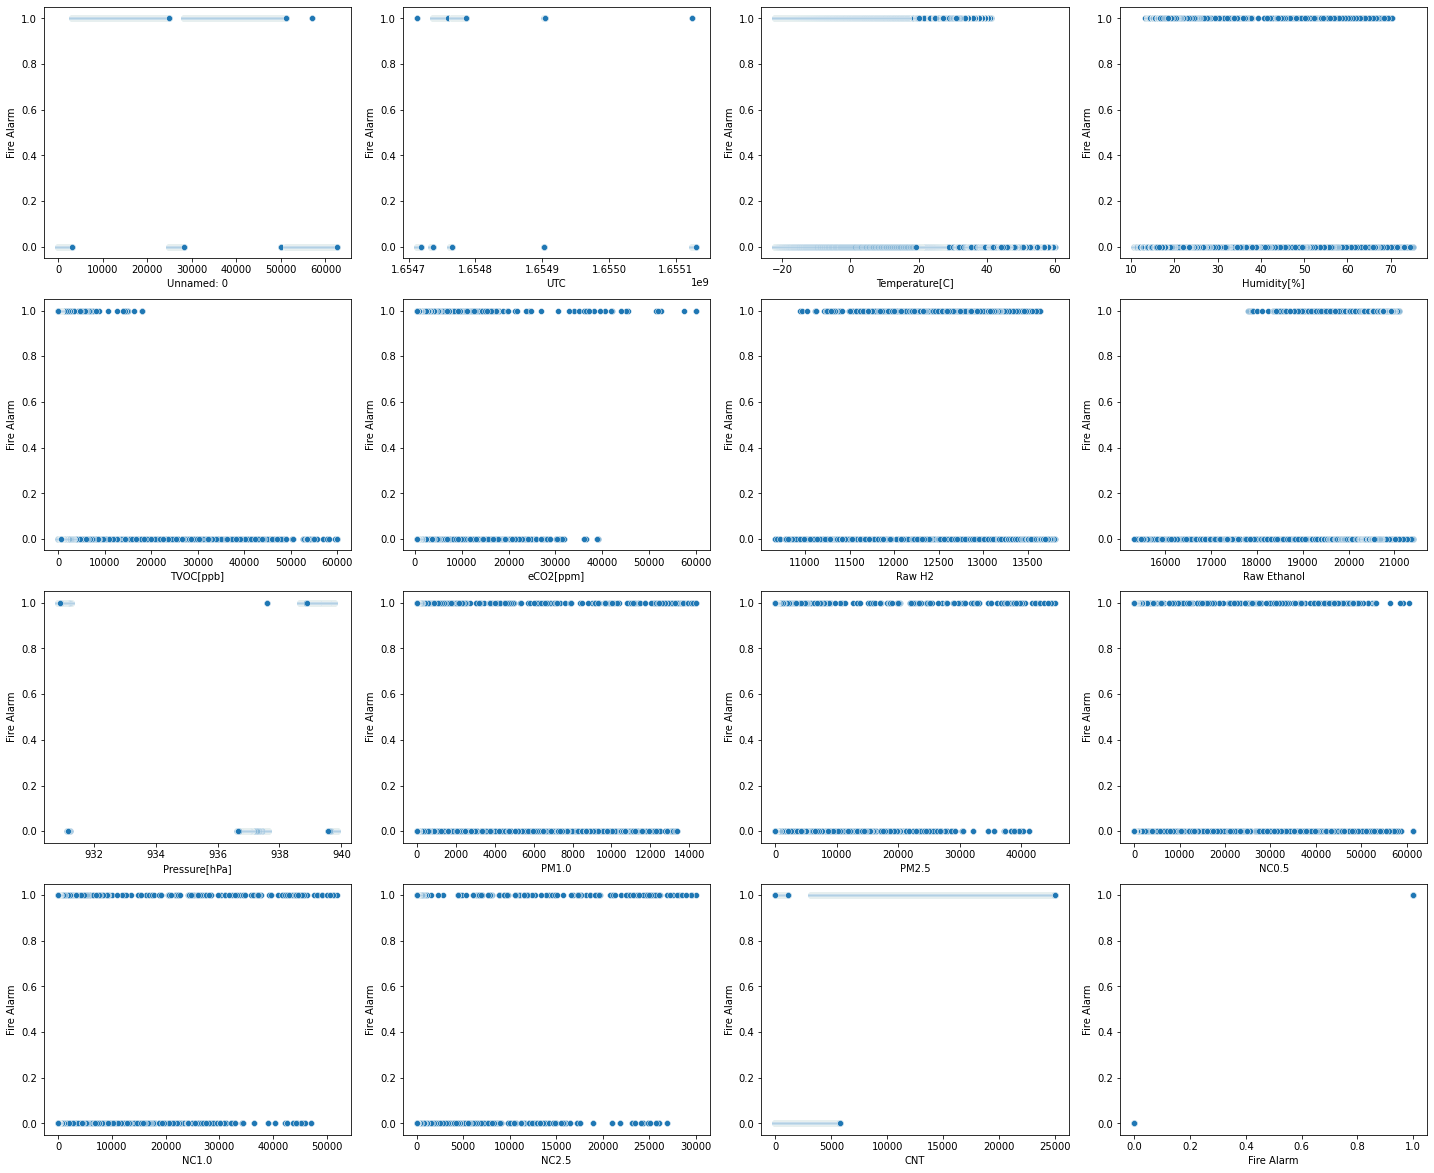

In [12]:
plt.figure(figsize=(20,20))

for index,column in enumerate(data_Numeric):
    plt.subplot(5,4,index+1)
    sns.scatterplot(data=data_Numeric,x=column,y=data["Fire Alarm"])
    
plt.tight_layout(pad = 1.0)

In [13]:
df2 = dfNumeric.copy()
df2.drop(["PM1.0","PM2.5","NC0.5","NC1.0","NC2.5"],axis = 1,inplace=True)

ValueError: ignored

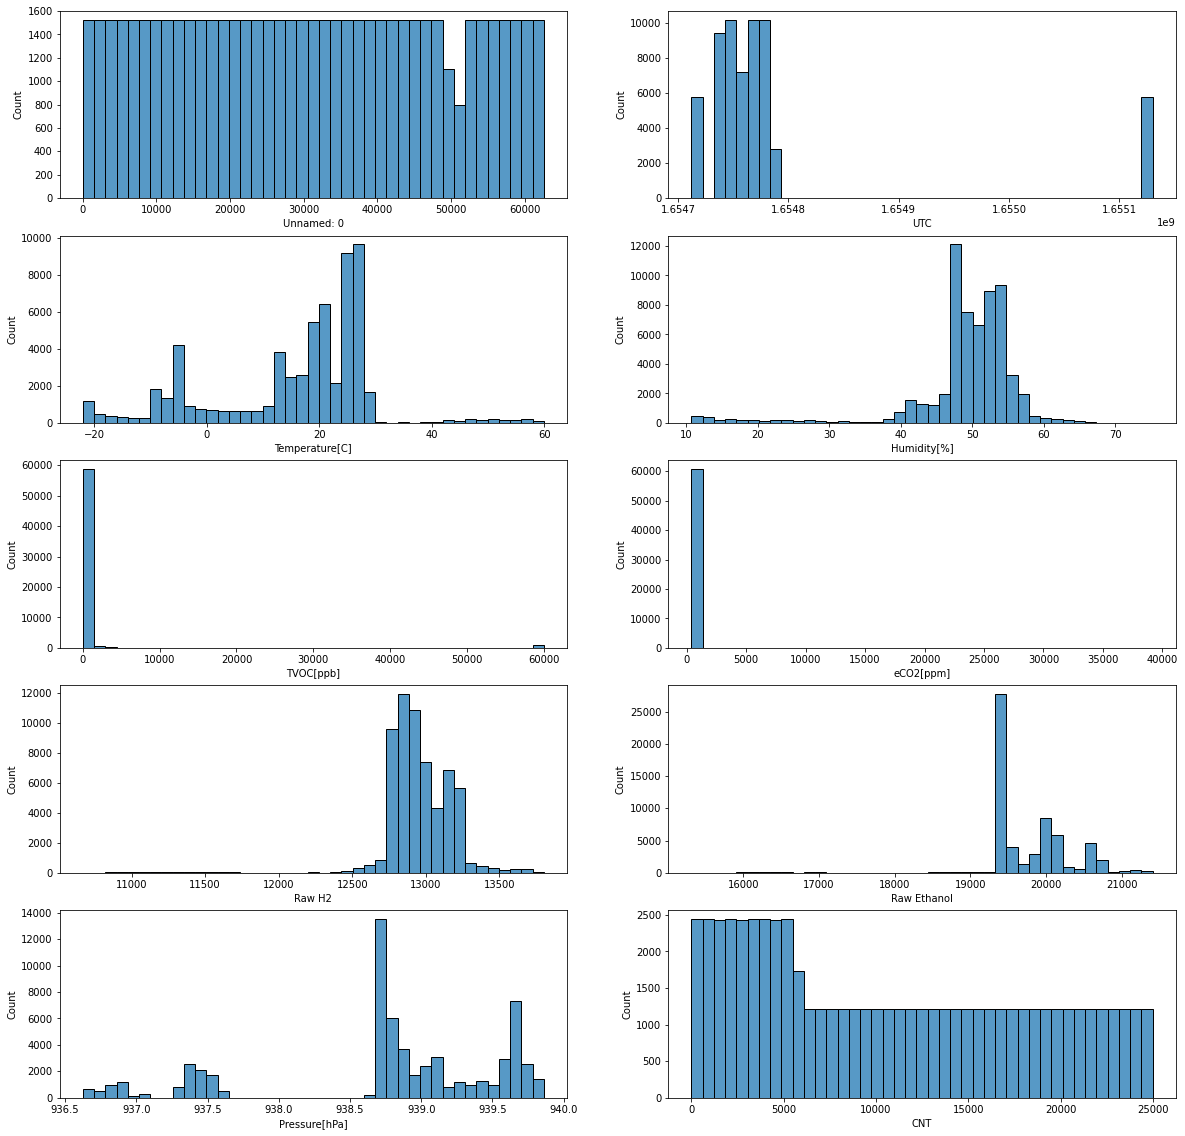

In [14]:
plt.figure(figsize=(20,20))

for index,column in enumerate(df2):
    plt.subplot(5,2,index+1)
    sns.histplot(data=dfNumeric,x=column,bins=41)
    
plt.tight_layout(pad = 1.0)

In [15]:
data_Numeric.drop(["eCO2[ppm]","TVOC[ppb]"],axis = 1,inplace=True)

In [16]:
df = data_Numeric.copy()

In [17]:
import plotly.express as px
px.histogram(dfNumeric,x="CNT",color = "Fire Alarm",barmode="group",text_auto=".2f")

In [18]:
px.histogram(dfNumeric,x="UTC",color = "Fire Alarm",barmode="group",text_auto=".2f")

In [19]:
px.histogram(dfNumeric,x="Temperature[C]",color = "Fire Alarm",barmode="group",text_auto=".2f")

In [20]:
px.histogram(dfNumeric,x="Humidity[%]",color = "Fire Alarm",barmode="group",text_auto=".2f")

In [21]:
df["Humidity[%]"].median()

50.15

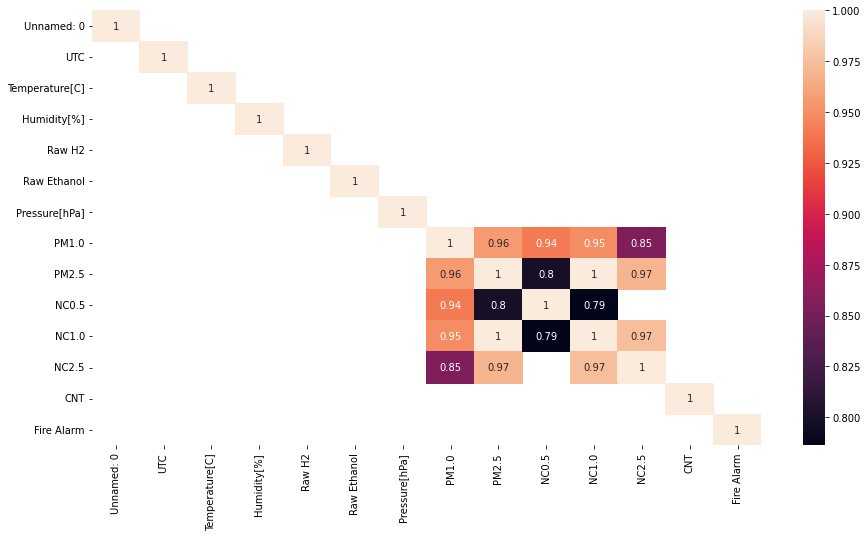

In [22]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,mask = corr < 0.7,annot = True)

In [23]:
df.drop(["PM2.5","NC0.5","NC1.0","NC2.5"],axis = 1,inplace=True)

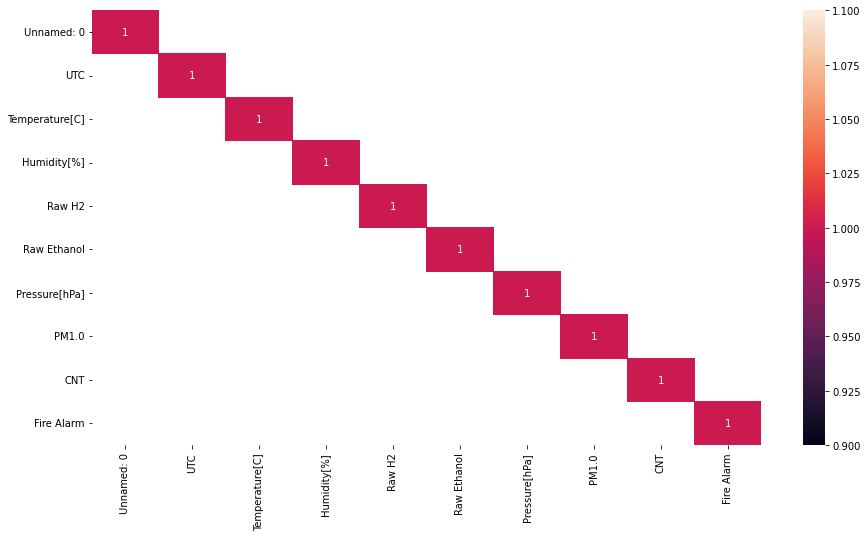

In [24]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,mask = corr < 0.7,annot = True)

# **Logestic Regression**

In [25]:
X = data.drop("Fire Alarm",axis=1)
y = data["Fire Alarm"]

In [26]:
# OLS Regression result 
import statsmodels.api as sm

X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             Fire Alarm   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     6988.
Date:                Fri, 07 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:19:33   Log-Likelihood:                -8278.0
No. Observations:               62630   AIC:                         1.659e+04
Df Residuals:                   62614   BIC:                         1.673e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            611.0059     26.012     23.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
column = X.columns
X = scaler.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 1)

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select = 3 , step = 1)
rfe = rfe.fit(X , y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

[False False False False False  True  True False False False False False
 False False False  True]
[14  4  9  8  5  1  1  7  2  3 10 11  6 12 13  1]


In [31]:
from sklearn.model_selection import GridSearchCV
from numpy import arange # for setting a range of numbers 

import warnings
warnings.filterwarnings('ignore')

model_lr = LogisticRegression()

parameter = dict()
parameter['random_state'] = arange(0,100,1)
parameter['C'] = arange(0.001,10,10)
parameter['penalty'] = ['l1','l2','elasticenet']
parameter['solver'] = ['newton-cg','lbfgs','liblinear','saga']

lr_grid = GridSearchCV(estimator = model_lr, param_grid = parameter, scoring = 'accuracy', cv = 5, n_jobs = -1)

lr_grid.fit(x_train,y_train)

print("Best Score", lr_grid.best_score_)
print("best parameter",lr_grid.best_params_)

Best Score 0.9448347153612145
best parameter {'C': 0.001, 'penalty': 'l1', 'random_state': 96, 'solver': 'saga'}


# **ANN**

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 1)

In [38]:
from re import S
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint

#model Declaration
model = Sequential()

# 1st Hidden layer and Input Layer 
model.add(Dense(units = 300, activation= 'relu',name = 'Hidden_Layer_1', input_dim =16))
model.add(Dropout(0.2)) # Helpfull to reduce/avoid overfitting 

# output layer 
model.add(Dense(units = 1, activation= 'sigmoid', name = 'Output_Layer')) # Targert varible is binary 

# model summary 
model.summary()

# model checkpoint using callbacks 

file = 'Best_Model.hdf5'
checkpoint = ModelCheckpoint(file, monitor = 'val_accuracy', save_best_only= True, mode = 'max', verbose = 2)
callbacks_list = [checkpoint]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 300)               5100      
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 Output_Layer (Dense)        (None, 1)                 301       
                                                                 
Total params: 5,401
Trainable params: 5,401
Non-trainable params: 0
_________________________________________________________________


In [39]:
x_train.shape

(50104, 16)

In [40]:
# model compilation 
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# model Fitting 
model.fit(x_train, y_train, validation_data= (x_test,y_test), epochs = 20, batch_size = 32, callbacks= callbacks_list )

Epoch 1/20
1545/1566 [============================>.] - ETA: 0s - loss: 0.1108 - accuracy: 0.9635
Epoch 1: val_accuracy improved from -inf to 0.99106, saving model to Best_Model.hdf5
1566/1566 [==============================] - 5s 3ms/step - loss: 0.1098 - accuracy: 0.9639 - val_loss: 0.0323 - val_accuracy: 0.9911
Epoch 2/20
1565/1566 [============================>.] - ETA: 0s - loss: 0.0213 - accuracy: 0.9967
Epoch 2: val_accuracy improved from 0.99106 to 0.99760, saving model to Best_Model.hdf5
1566/1566 [==============================] - 4s 2ms/step - loss: 0.0213 - accuracy: 0.9967 - val_loss: 0.0168 - val_accuracy: 0.9976
Epoch 3/20
1544/1566 [============================>.] - ETA: 0s - loss: 0.0125 - accuracy: 0.9979
Epoch 3: val_accuracy improved from 0.99760 to 0.99936, saving model to Best_Model.hdf5
1566/1566 [==============================] - 4s 2ms/step - loss: 0.0124 - accuracy: 0.9980 - val_loss: 0.0114 - val_accuracy: 0.9994
Epoch 4/20
1545/1566 [========================

In [41]:
# predecting 
model.load_weights('Best_Model.hdf5')
y_pred = model.predict(x_test)
y_pred = (y_pred>0.5)
y_pred

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [43]:
# model accurcy 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[3646    0]
 [   2 8878]] : is the confusion matrix 

0.9998403321092129 : is the accuracy score
1.0 : is the precision score
0.9997747747747747 : is the recall score
0.9998873747043586 : is the f1 score


In [ ]:
# Tuning Hyper paramater Keras Tuner 
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.5 MB/s 
     |████████████████████████████████| 1.6 MB 37.0 MB/s 


In [ ]:
import keras_tuner as kt 
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, Dropout

def build_model(hp):
  model = Sequential()
  hp_units = hp.Int('HL',min_value = 50, max_value = 100,step = 1)
  model.add(Dense(units = hp_units, activation = 'relu')) # hidden layer 1 

  # the dropout layer 
  hp_dropout = hp.Float('Dropout', min_value = 0.1, max_value= 0.5, step = 0.1)
  model.add(Dropout(hp_dropout))
  
  model.add(Dense(units = 1, activation='sigmoid'))

  hp_epochs = hp.Int('Epochs', min_value =50, max_value = 200, step =1)
  hp_batch = hp.Choice('Batch size', [8,16,32,64,128])
  hp_optimizer = hp.Choice('Optimizer', ['adam','sgd','rmsprop'])

  model.compile(optimizer = hp_optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
tuner = kt.RandomSearch(build_model, objective= 'val_accuracy', max_trials = 5)
tuner.search(x_train,y_train, validation_data = (x_test,y_test), epochs = 20)

Trial 5 Complete [00h 01m 11s]
val_accuracy: 0.999521017074585

Best val_accuracy So Far: 0.9998403191566467
Total elapsed time: 00h 06m 42s


In [ ]:
for h_params in[f'HL' for i in range(1)] + [f'Epochs' for i in range(1)] + ['Batch size'] + ['Optimizer']:
  print(h_params, tuner.get_best_hyperparameters()[0].get(h_params))

HL 74
Epochs 179
Batch size 128
Optimizer adam


In [ ]:
# for drop out 
for h_params in[f'HL' for i in range(1)] + [f'Epochs' for i in range(1)] + ['Dropout'] + ['Optimizer']:
  print(h_params, tuner.get_best_hyperparameters()[0].get(h_params))

HL 74
Epochs 179
Dropout 0.4
Optimizer adam


In [ ]:
tuner.results_summary() # to get the summary of all the tials 

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
HL: 74
Dropout: 0.4
Epochs: 179
Batch size: 128
Optimizer: adam
Score: 0.9998403191566467
Trial summary
Hyperparameters:
HL: 59
Dropout: 0.2
Epochs: 114
Batch size: 32
Optimizer: adam
Score: 0.9998403191566467
Trial summary
Hyperparameters:
HL: 78
Dropout: 0.2
Epochs: 142
Batch size: 8
Optimizer: rmsprop
Score: 0.999521017074585
Trial summary
Hyperparameters:
HL: 51
Dropout: 0.2
Epochs: 122
Batch size: 128
Optimizer: rmsprop
Score: 0.9992814660072327
Trial summary
Hyperparameters:
HL: 73
Dropout: 0.5
Epochs: 141
Batch size: 8
Optimizer: rmsprop
Score: 0.9992814660072327


# **CNN**

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, MaxPool1D, Flatten, Input, MaxPooling1D
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(16,1)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 15, 64)            192       
                                                                 
 dense (Dense)               (None, 15, 16)            1040      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 16)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 112)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 339       
                                                                 
Total params: 1,571
Trainable params: 1,571
Non-trainable params: 0
____________________________________________________

In [44]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs = 20,batch_size=16)

Epoch 1/20
3132/3132 [==============================] - 6s 2ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.0053 - val_accuracy: 0.9997
Epoch 2/20
3132/3132 [==============================] - 6s 2ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0052 - val_accuracy: 0.9997
Epoch 3/20
3132/3132 [==============================] - 6s 2ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.0054 - val_accuracy: 0.9994
Epoch 4/20
3132/3132 [==============================] - 6s 2ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0170 - val_accuracy: 0.9946
Epoch 5/20
3132/3132 [==============================] - 6s 2ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0050 - val_accuracy: 0.9997
Epoch 6/20
3132/3132 [==============================] - 6s 2ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0050 - val_accuracy: 0.9997
Epoch 7/20
3132/3132 [==============================] - 6s 2ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0068 - val_accuracy:

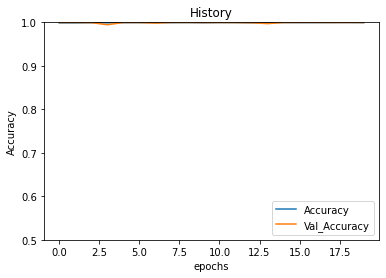

In [45]:
plt.plot(history.history['accuracy'],label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_Accuracy')
plt.title('History')
plt.ylabel('Accuracy')
plt.xlabel('epochs') 
plt.ylim([0.5,1])
plt.legend(loc = 'lower right')

In [46]:
model.evaluate(x_test,y_test)

392/392 [==============================] - 1s 2ms/step - loss: 0.0038 - accuracy: 0.9998


[0.003787445370107889, 0.9997605085372925]